# Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize 
from gensim.models import Word2Vec 
from nltk.stem import WordNetLemmatizer 

In [4]:
import warnings   
warnings.filterwarnings(action = 'ignore') 

# Data

In [5]:
data = pd.read_csv('TripAdvisor.csv')

In [6]:
data.head()

,Rating,Review
0,3,"2/3 STAR CATOGORY, VALUE FOR MONEY IF YOU GET ..."
1,4,"Good ambience, decent crowd, good food and ser..."
2,1,If you want to weekend at this place don’t ste...
3,4,The hotel is located middle of the highway. Th...
4,4,We went here for a wedding function. The rooms...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673 entries, 0 to 1672
Data columns (total 2 columns):
Rating    1673 non-null int64
Review    1673 non-null object
dtypes: int64(1), object(1)
memory usage: 26.2+ KB


In [8]:
def sentiment(x):
    if x < 3:
        return 1 #negative
    else:
        return 0 #positive
data['Sentiment'] = data['Rating'].apply(sentiment)

In [9]:
data.head()

,Rating,Review,Sentiment
0,3,"2/3 STAR CATOGORY, VALUE FOR MONEY IF YOU GET ...",0
1,4,"Good ambience, decent crowd, good food and ser...",0
2,1,If you want to weekend at this place don’t ste...,1
3,4,The hotel is located middle of the highway. Th...,0
4,4,We went here for a wedding function. The rooms...,0


In [10]:
data.describe()

,Rating,Sentiment
count,1673.000000,1673.000000
mean,3.153616,0.292289
std,1.304097,0.454951
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,4.000000,1.000000
max,5.000000,1.000000


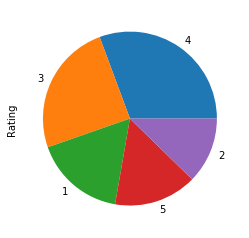

In [11]:
data['Rating'].value_counts().plot.pie()

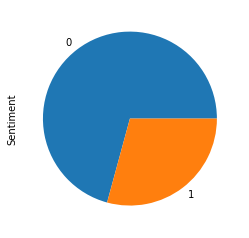

In [12]:
data['Sentiment'].value_counts().plot.pie()

**Stopwords**



In [13]:
with open('stopwords.txt') as f:
    stopwords = f.readlines()

In [14]:
stopwords = (set(map(lambda x: x.strip(), stopwords))|set(['.', 'hotel', 'room', 'i']))-set(['neither', 
    'no', 'not', 'nor', 'none', 'never'])

In [15]:
print(list(sorted(stopwords)), len(stopwords))

['.', 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'ain', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'aren', "aren't", 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'computer', 'con', 'could', 'couldn', "couldn't", 'couldnt', 'cry', 'd', 'de', 'describe', 'detail', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify'

# Analysis
* Remove puntuation
* Remove numbers
* Remove Extra White Spaces
* Word tokenize
* Lower Case
* Stopwords removal
* Lemmatize

In [16]:
def remove_stop_words__lemmatize(X):
#     lemmatizer = WordNetLemmatizer()
    features = []
    for x in X:
        if x.lower() not in stopwords:
            features.append(x.lower())#lemmatizer.lemmatize(x))
    return features

In [17]:
data['Review'] = data['Review'].apply(lambda x : re.sub(r'\.', ' . ', x))
data['Review'] = data['Review'].apply(lambda x : re.sub(r'\s+', ' ', x))

In [18]:
reviews = data['Review'].apply(lambda x : re.sub(r'\W', ' ', x))
reviews = reviews.apply(lambda x : re.sub(r'\d', ' ', x))
reviews = reviews.apply(lambda x : re.sub(r'\.', ' . ', x))
reviews = reviews.apply(lambda x : re.sub(r'\s+', ' ', x))
reviews = reviews.apply(lambda x : x.strip())
reviews = reviews.apply(lambda x : ' '.join(remove_stop_words__lemmatize(word_tokenize(x.lower()))))

In [19]:
pd.concat([pd.DataFrame(reviews), data['Sentiment']], axis=1).to_csv('review_clean.csv', index=False)

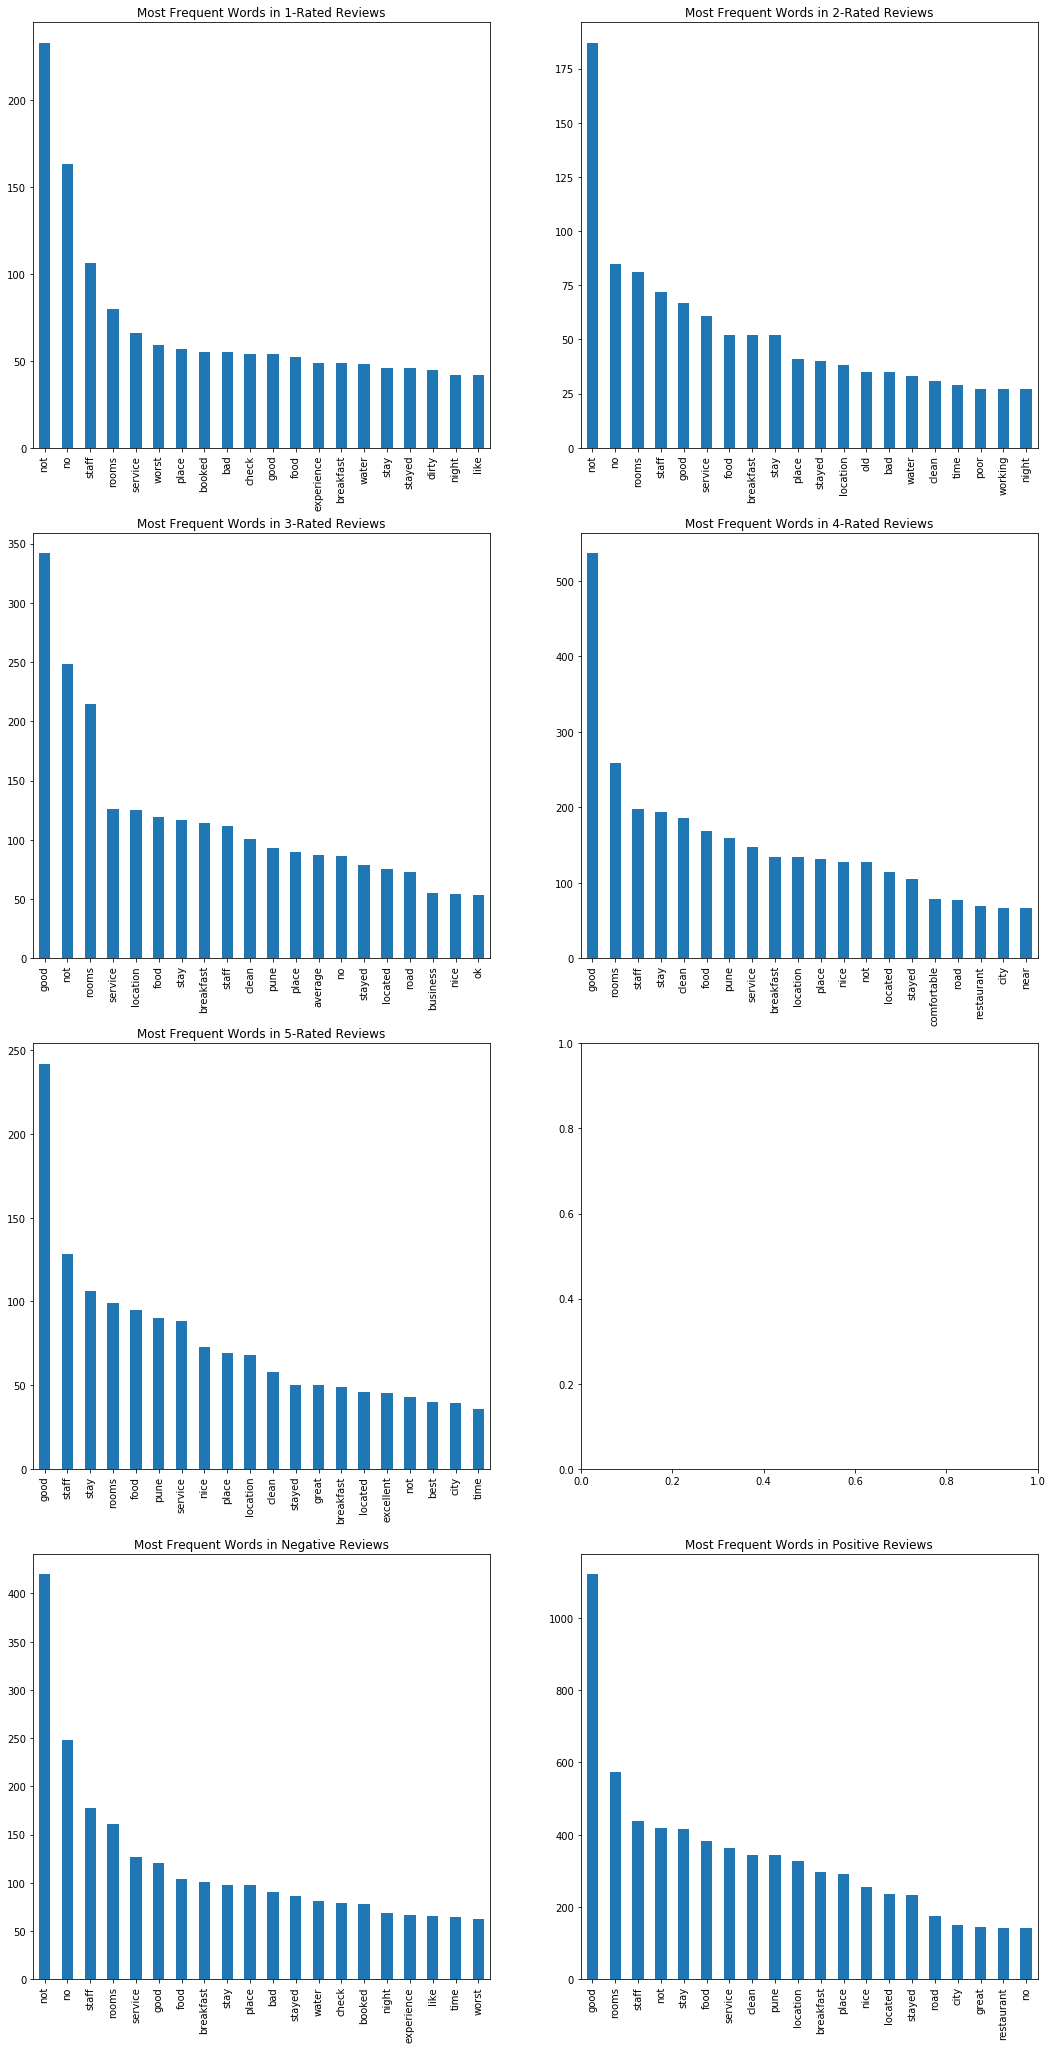

In [20]:
fig, ax = plt.subplots(figsize=(18,36), nrows=4, ncols=2)

pd.Series(' '.join(reviews[data['Rating']==1]).lower().split()).value_counts()[:20].plot.bar(ax =ax[0][0])
ax[0][0].set_title('Most Frequent Words in 1-Rated Reviews')

pd.Series(' '.join(reviews[data['Rating']==2]).lower().split()).value_counts()[:20].plot.bar(ax =ax[0][1])
ax[0][1].set_title('Most Frequent Words in 2-Rated Reviews')

pd.Series(' '.join(reviews[data['Rating']==3]).lower().split()).value_counts()[:20].plot.bar(ax =ax[1][0])
ax[1][0].set_title('Most Frequent Words in 3-Rated Reviews')

pd.Series(' '.join(reviews[data['Rating']==4]).lower().split()).value_counts()[:20].plot.bar(ax =ax[1][1])
ax[1][1].set_title('Most Frequent Words in 4-Rated Reviews')

pd.Series(' '.join(reviews[data['Rating']==5]).lower().split()).value_counts()[:20].plot.bar(ax =ax[2][0])
ax[2][0].set_title('Most Frequent Words in 5-Rated Reviews')


pd.Series(' '.join(reviews[data['Sentiment']==1]).lower().split()).value_counts()[:20].plot.bar(ax =ax[3][0])
ax[3][0].set_title('Most Frequent Words in Negative Reviews')

pd.Series(' '.join(reviews[data['Sentiment']==0]).lower().split()).value_counts()[:20].plot.bar(ax =ax[3][1])
ax[3][1].set_title('Most Frequent Words in Positive Reviews')


plt.show()

# Keywords Extraction and Summarization

In [21]:
from nltk import pos_tag

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
from fuzzywuzzy import fuzz

In [24]:
from scipy.sparse import coo_matrix

In [25]:
def check_duplicacy(keyword, results):
    fuzz_sim = 0
    for k in results:
        fuzz_sim = max(fuzz.token_set_ratio(k, keyword), fuzz_sim)
    return 1 if fuzz_sim >= 80 else 0

In [26]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=3):
    score_vals = []
    feature_vals = []
    
    for idx, score in sorted_items:
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
        
    results= []
    for idx in range(len(feature_vals)):
        if check_duplicacy(feature_vals[idx], results) == 0:
            results.append(feature_vals[idx])
        if len(results) == topn:
            break
    
    return results

def extract_excerpts(index, k, vectorizer):
    feature_names=vectorizer.get_feature_names()
    doc=reviews[index]
    tf_idf_vector=vectorizer.transform([doc])
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    keywords=extract_topn_from_vector(feature_names,sorted_items,k)
    print("\nAbstract:")
    print(data['Review'][index])
    print("\nKeywords:")
    print(keywords)
    print("\nExcerpts:")
    for k in keywords:
        print(''.join(re.findall('('+')(.*)?('.join(k.split())+')', data['Review'][i].lower())[0]))
    print('-'*100)
    return keywords

def extract_keywords(index, k, vectorizer):
    feature_names=vectorizer.get_feature_names()
    doc=reviews[index]
    tf_idf_vector=vectorizer.transform([doc])
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    keywords=extract_topn_from_vector(feature_names,sorted_items,k)
    print("\nAbstract:")
    print(data['Review'][index])
    print("\nKeywords:")
    print(keywords)
    print('-'*100)
    return keywords

In [27]:
def indices_for_rating(rating):
    indices = []
    for i in range(len(reviews)):
        if data.iloc[i]['Rating']==rating:
            indices.append(i)
    return indices

## Summary based on Keywords

In [28]:
vectorizer1 = TfidfVectorizer(ngram_range=(2,4))
vectorizer1.fit(reviews)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [29]:
keywords1 = []
for i in indices_for_rating(5)[:5]:
    keywords1 += extract_excerpts(i, 3, vectorizer1)


Abstract:
Very calm and silent place, Good an clean rooms . Perfect weekend gateway from Pune . It hasn't good sceneries but if someone wants to spend peaceful time with family/partner, its the place . Amazing food at restaurant was an added advantage . :)

Keywords:
['weekend gateway pune good', 'wants spend peaceful time', 'time family partner place']

Excerpts:
weekend gateway from pune . it hasn't good
wants to spend peaceful time
time with family/partner, its the place
----------------------------------------------------------------------------------------------------

Abstract:
Had a great experience staying at Hotel Brookside, located at Prime place . Poolside party and DJ at cafe are really good . Have been to this place many times . Specially the taste of Dal Bukhara, one can't resist have a bowl . Great rooms, good food, great staff . 

Keywords:
['times specially taste dal', 'taste dal bukhara resist', 'staying brookside located prime']

Excerpts:
times . specially the tast

## POS based Keywords

In [30]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [31]:
def reduce_pos(x):
    tags = pos_tag(word_tokenize(x.lower()))
    words = []
    for t in tags:
        if t[1] in ['FW', 'JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS', 'RB', 'RBR', 'RBS']:
            words.append(t[0])
    return ' '.join(words)
reduced_reviews = reviews.apply(reduce_pos)

In [32]:
vectorizer2 = TfidfVectorizer(ngram_range=(1,2))
vectorizer2.fit(reduced_reviews)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [33]:
keywords2 = []
for i in indices_for_rating(1):
    keywords2 += extract_keywords(i, 3, vectorizer2)


Abstract:
If you want to weekend at this place don’t stey very bad service only food is good otherwise all things in this resort is wasted Dharamshala is better than this resort inter com is not working hot water is not in tab so many tv channel is not available 

Keywords:
['resort', 'weekend place', 'want weekend']
----------------------------------------------------------------------------------------------------

Abstract:
Please do not take a risk of booking at this Hotel; I had booked for 2nd October, 2015 for 1 night which I intended to continue if the facilities were good . I being from same industry had lot of expectation from the so called Resort . First of all it’s not LONAVALA (Annexe as…

Keywords:
['october night', 'not risk', 'lot expectation']
----------------------------------------------------------------------------------------------------

Abstract:
The hotel is so poorly maintained that you will puke at the first smell . The paints are peeling off, wood polish wan

Abstract:
Had gone for Buffet Breakfast and had the worst experience . Tasteless food and worst service . There was no one to attend or to look after if anything is required or not . No variety which claim of giving for breakfast . Will never visit again . 

Keywords:
['no', 'worst', 'variety claim']
----------------------------------------------------------------------------------------------------

Abstract:
I checked into the hotel in the evening and was told that they do not have the key to the drawer where they room keys are kept and so i was asked to be accompanied by housekeeping person and so i did and was told i would get the key in the room shortly . 2 hours later i am still…

Keywords:
['told', 'key', 'shortly hours']
----------------------------------------------------------------------------------------------------

Abstract:
Booked this hotel based on the reviews and rating but it was bad experience . Their front desk staff is the opposite of hospitality and they don't ev


Abstract:
This is not a place which one should consider for staying . No free wi-fi, thought they claim it on their webpage . Everytime you come back in the evening, you need to recharge the wi-fi card which works as a key to your room . This is the most frustrating thing that you can not…

Keywords:
['wi fi', 'webpage everytime', 'thought']
----------------------------------------------------------------------------------------------------

Abstract:
If you want to experience sleepless night and on the top of it staff ready to make you feel victimized then hotel kala sagar is is perfect place . complete waste of money . the only good thing about it is its strategic location and thats all . 

Keywords:
['want experience', 'victimized kala', 'thing strategic']
----------------------------------------------------------------------------------------------------

Abstract:
Have never ever stayed in a hotel like Woodland Pune . We travelled from Australia and the room had a broken Aircon u


Abstract:
Food was horrible, only vegetarian food served, that too of south Indian cuisine chiefly . Rooms were very simple . They promise you a lots of things, but hardly I could find them in a executive room . No swimming pool, no gym . TV was streaming only 3 channels, which was justified…

Keywords:
['no', 'things hardly', 'swimming']
----------------------------------------------------------------------------------------------------

Abstract:
a friend of mine recommended this hotel, so we checked in around 11 PM after a visit to Ajanta & Ellora . So, we were tried and got into the hotel . There was no hot water in shower and tried to call couple of times to complaint, but no one picks the call . later, there is no water…

Keywords:
['no', 'tried', 'visit ajanta']
----------------------------------------------------------------------------------------------------

Abstract:
Not maintained properly . Location is not bad though . Food is average . Rooms are bad, water lickage, not 

['telephonic confirmation', 'hrs prior', 'child']
----------------------------------------------------------------------------------------------------

Abstract:
My nightmare began when I started searching for Hotel Smart Inn at Pune . My office admin had booked me in and none of the auto-drivers could find the place . I had driven in from Mumbai in a cab that dropped me off at a central point in a light drizzle around 9 p . m . With a…

Keywords:
['started', 'point light', 'office admin']
----------------------------------------------------------------------------------------------------

Abstract:
Pls don't try this property at all . It's my humble request . Staff is non friendly, they are very rude . Specifically named Kiran Joshi is really rude & non helpful . He is not from hospitality industry I guess . Looks like he is from a Dharmshala . Pls make sure this guy (Kiran…

Keywords:
['pls', 'kiran', 'rude']
---------------------------------------------------------------------------


Abstract:
I booked my parents into treebo Deccan 8 . They had put up at this place a couple of times earlier . But this time around the place seemed to have undergone a radical change as far as the clientele was concerned . This has turned into a hangout spot for people to get drunk . Yes . . …

Keywords:
['undergone radical', 'spot people', 'radical change']
----------------------------------------------------------------------------------------------------

Abstract:
That's the only word I can think about title of this review . Guys one more thing don't book through Booking . com, they don't even have customer care no . Details they mailed to me and details of booking hotel have are different and above that hotel is not taking any efforts to…

Keywords:
['details', 'booking', 'title review']
----------------------------------------------------------------------------------------------------

Abstract:
booked a delux room nither the ac was working nither was the refrigerator the serv


Abstract:
When i went to stay at this property in May , i was only there 3 hours and the whole 2nd floor went on fire , i swallowed smoke and had to go to hospital . . in between this the staff were trying to put the electrical fire out with water and no fire alarms went off . . . i was…

Keywords:
['smoke hospital', 'property hours', 'hours nd']
----------------------------------------------------------------------------------------------------

Abstract:
There was a power cut in which AC was not working, the staff was rude and non cooperative . Breakfast was also tasteless . Service was bad and horrible . Never will prefer it . The staff use to argue even if we ask for plates and spoons to eat and didn't kept sufficient toiletries…

Keywords:
['use argue', 'tasteless service', 'sufficient toiletries']
----------------------------------------------------------------------------------------------------

Abstract:
I booked the room via MakeMyTrip app and checked into the hotel late nig

Abstract:
This is a place even after having confirmed booking don't give you room when you landau 12 . 30 AM at eh hotel wanting to travel to Sholapur at 7 AM the morning . They take an advance of Rs 2500 and give yo a hell hole, even though you asked them to show the room prior to check…

Keywords:
['yo hell', 'travel sholapur', 'sholapur morning']
----------------------------------------------------------------------------------------------------

Abstract:
If you are travelling with friends or family and you have female with you then avoid this Hotel as their staff lacks basic etiquette and they stare at females as if they have never seen a women in their life . Their front office manager (Gajanand) is a sick guy who is a curse to…

Keywords:
['women life', 'stare', 'sick guy']
----------------------------------------------------------------------------------------------------

Abstract:
Bel Air is definitely my worst travel experience till date . I stayed there for a night and I do


Abstract:
We had to stay here because all of the hotels at the time were fully booked due to Brad and Angelina visiting the city . We reluctantly booked in for 2 nights (reluctant because we'd heard bad reviews already from colleagues that had stayed there), the check in was average, the…

Keywords:
['booked', 'visiting', 'time fully']
----------------------------------------------------------------------------------------------------

Abstract:
Staff are not focused on customer delight . Especially the receptionist of last day was acting cranky as if he owned the property and was doing a favor by letting me stay, as if i was not paying . Staff are not supportive of customers requirement . Food quality is sub-standard . Overall unhappy :( …

Keywords:
['staff not', 'supportive customers', 'standard overall']
----------------------------------------------------------------------------------------------------

Abstract:
My Self Rittam Thakur n m from Manali, Hp . When I entered the hote


Abstract:
Dharam sala in Gujarats are much more better then this hotel . . . . . . . . . Never take this option till any worst option is available . terrific sound around the hotel not a good place to even opening a hotel and the way of service is also worst

Keywords:
['option', 'worst', 'way service']
----------------------------------------------------------------------------------------------------

Abstract:
Myself and my travelling partner stopped here for 8 stressful days in that time we were bitten by bed bugs consequently leading to doctors fees and medication . We had to constantly ask for room service as without this our room would remain unhygienic and to refill tea coffee sugar etc . The hotel when we stopped was undergoing redevelopment and as long as sleep was not a priority or you like the sound or drilling along with the fumes or hammering then this hotel is for you…

Keywords:
['unhygienic refill', 'time bitten', 'stressful days']
------------------------------------


Abstract:
I booked a room at this hotel for 2 nights and 1 day . Hotel is situated at good location . I paid Rs . 1200 + taxes exclusive . I had a worst experience ever . I booked this place looking at cost and location of the hotel . But hotel staff was worst ever . The manager at reception did…

Keywords:
['booked', 'worst', 'taxes exclusive']
----------------------------------------------------------------------------------------------------

Abstract:
The place was horrible, the place doesnt look as d pics are shown . The property is too old and needs great renovation . The rooms are spacious . The breakfast was good . The car cleaning was not done as mentioned in the inclusion but it was done later on after lot of arguments . …

Keywords:
['spacious breakfast', 'renovation rooms', 'place horrible']
----------------------------------------------------------------------------------------------------

Abstract:
I stayed in this hotel with my parents in 24th to 26th Jan, 2013 . First

Abstract:
We booked this place for a wedding . Booked almost entire hotel for the guests based on some inputs . Awful service poor quality food, very arrogant staff especially one of the manager by the name Vivek! Height of un professionalism was put on show, these cheats allotted one of…

Keywords:
['booked', 'professionalism cheats', 'place wedding']
----------------------------------------------------------------------------------------------------

Abstract:
worst hotel, worst staff , worst service and above all worst manager I have ever seen, initially they promise some thing else and at the end they simply refuse . I would request you people not arrange any function over there as I have suffered a lot . actually I don't have words…

Keywords:
['worst', 'thing end', 'request people']
----------------------------------------------------------------------------------------------------

Abstract:
Hotel is located outside city limit . There is frequent power outage in hotel . Once pow


Abstract:
I am not the sorts to complain but Beverly Hills, Lulla Nagar, Pune is really the pits when it comes to customer relations . Rude, non cooperative staff that I have never encountered before . Lovely property . . . but poorly managed and lacks even the basic hospitality ethics . …

Keywords:
['sorts', 'relations', 'lovely property']
----------------------------------------------------------------------------------------------------

Abstract:
Having to visit Kondhwa, Pune for a day, I booked this hotel on Goibibo, as I could not find any other Hotel in the vicinity . I got a discount from Goibibo, so thought it was a good deal until I reached the hotel . There was a single staff member on the reception desk, who did…

Keywords:
['goibibo', 'visit kondhwa', 'thought good']
----------------------------------------------------------------------------------------------------

Abstract:
I've been staying here for more than a month now . There Service is pathetic . Very unorganized


Abstract:
Surprised - How this hotel get 3 + ratings and how this hotel manages to keep their license(3*** :0)) . Very frustrating and worst experience . We Regret Our Stay . We had booked 2 double executive rooms (For a family of four) for nine nights 1-1/2 months before our stay in…

Keywords:
['surprised ratings', 'regret stay', 'nights months']
----------------------------------------------------------------------------------------------------

Abstract:
Having stayed here last month, I strongly recommend that no one should ever stay at this hotel . The staff here is mannerless and needs a reality check . The shameless staff told my Girlfriend that we cannot be in the same room since we are not married . At first I was a little…

Keywords:
['staff mannerless', 'shameless staff', 'not married']
----------------------------------------------------------------------------------------------------

Abstract:
This place may look good from the outside , but once inside its like you are c


Abstract:
Worst room I have ever stayed in . I am staying in Aundh Retreat Pune . Worst staff . Worst hospitality . Worst service . They will not listen to your requests even after requesting them for 3 continuous days . They would treat you as if they are doing a favour to you by letting me…

Keywords:
['worst', 'staying', 'retreat pune']
----------------------------------------------------------------------------------------------------

Abstract:
They have in house laundry service, but will either loose your cloths or will give them in different colours . Cook says he doesn't know how to make what is written in their Own menu Card . And TV never works . AC makes noise and remotes are shared between rooms . And yes Wifi . . …

Keywords:
['service loose', 'noise remotes', 'menu card']
----------------------------------------------------------------------------------------------------

Abstract:
And in this hotel I did not find such a service, I felt like I stayed in a lodgeThis hotel

In [34]:
keywords2_ = flatten(list(map(lambda x : x.split(), keywords2)))

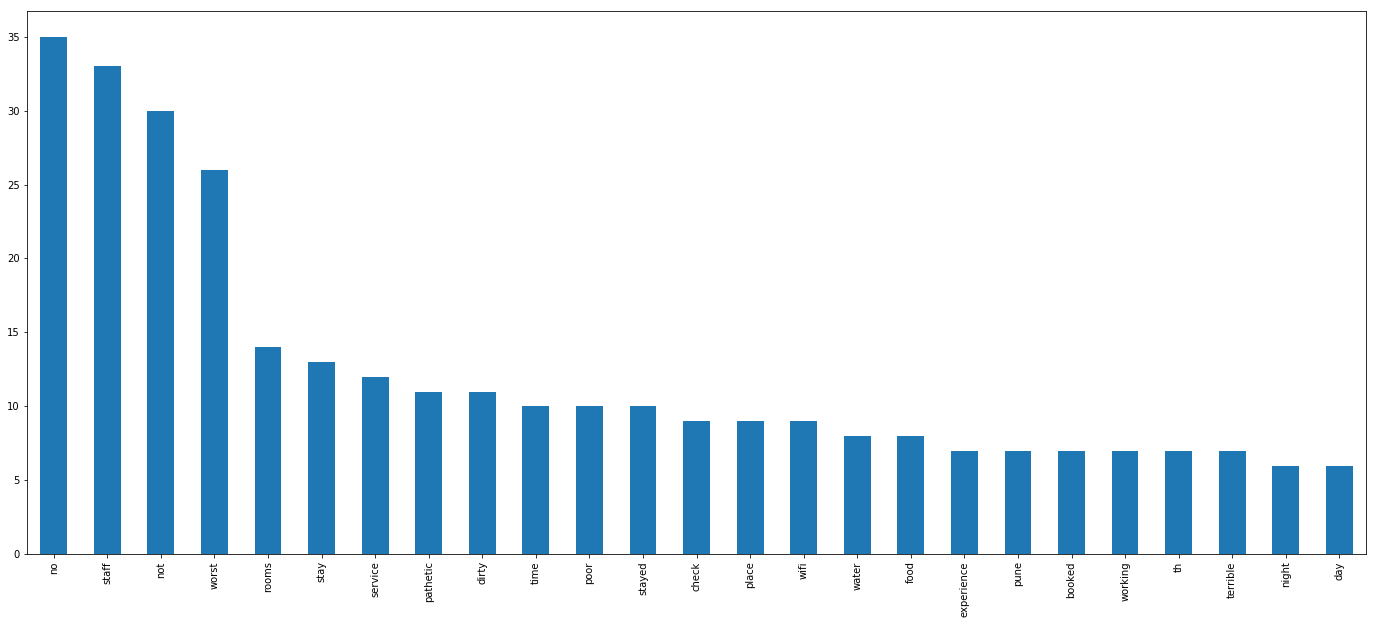

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 10))
pd.Series(keywords2_).value_counts().head(25).plot.bar(ax=ax)

In [36]:
tags = pos_tag(keywords2_)

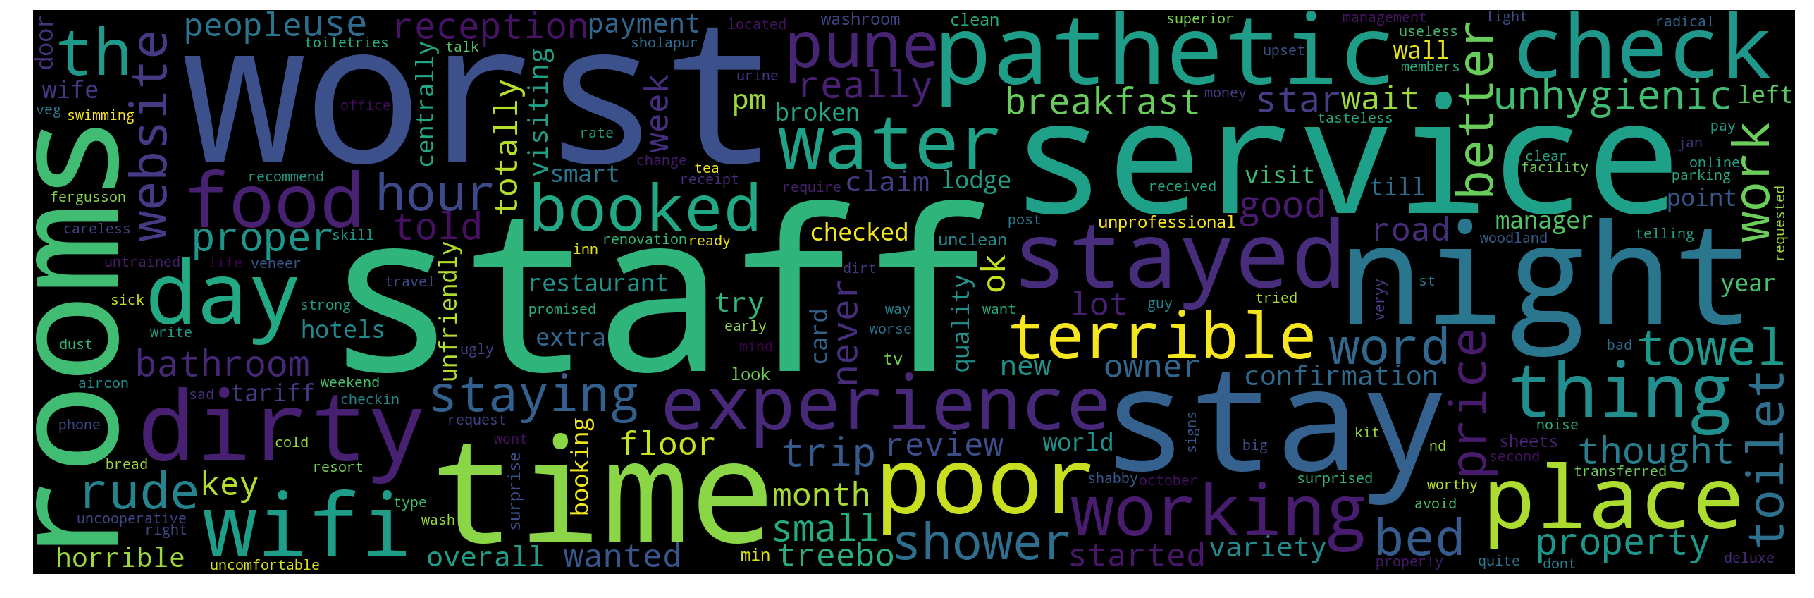

In [37]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 2500, height = 800, 
                background_color ='black', min_font_size = 10).generate(' '.join(keywords2_)) 
plt.figure(figsize = (25, 10)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## Insights based on POS based Keywords

In [38]:
kws= pd.Series(keywords2_).value_counts().index.tolist()

In [39]:
kws = [k for k in kws if k not in ['neither', 'no', 'not', 'nor', 'none', 'never']]

In [40]:
kws = kws[:25]

In [41]:
def relations(tags):
    insights = []
    for i in range(len(tags)):
        if tags[i][0] in kws and tags[i][1] in ['JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS', 'RB', 'RBR', 'RBS']:
            if tags[i][1] in ['JJ', 'JJR', 'JJS']:
                # Adjective -> search for nearest noun (after)
                # after
                j = i
                while j < len(tags):
                    if tags[j][1] in ['NN', 'NNS', 'NNP', 'NNPS'] and tags[j][0] not in ',.\'’':
                        insights.append(tags[i][0]+' '+tags[j][0])
                        break
                    if tags[j][0] == '.':
                        break
                    j += 1
                # before
                j = i
                while j > 0:
                    if tags[j][1] in ['NN', 'NNS', 'NNP', 'NNPS'] and tags[j][0] not in ',.\'’':
                        insights.append(tags[j][0]+' '+tags[i][0])
                        break
                    if tags[j][0] == '.':
                        break
                    j -= 1
            elif tags[i][1] in ['RB', 'RBR', 'RBS']:
                # Adjverb -> search for nearest verb (before)
                 # after
                j = i
                while j < len(tags):
                    if tags[j][1] in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'] and tags[j][0] not in ',.\'’':
                        insights.append(tags[i][0]+' '+tags[j][0])
                        break
                    if tags[j][0] == '.':
                        break
                    j += 1
                # before
                j = i
                while j > 0:
                    if tags[j][1] in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'] and tags[j][0] not in ',.\'’':
                        insights.append(tags[j][0]+' '+tags[i][0])
                        break
                    if tags[j][0] == '.':
                        break
                    j -= 1
            else:
                # noun -> search for nearest adjective (before)
                # after
                j = i
                while j < len(tags):
                    if tags[j][1] in ['JJ', 'JJR', 'JJS'] and tags[j][0] not in ',.\'’':
                        insights.append(tags[i][0]+' '+tags[j][0])
                        break
                    if tags[j][0] == '.':
                        break
                    j += 1
                # before
                j = i
                while j > 0:
                    if tags[j][1] in ['JJ', 'JJR', 'JJS'] and tags[j][0] not in ',.\'’':
                        insights.append(tags[j][0]+' '+tags[i][0])
                        break
                    if tags[j][0] == '.':
                        break
                    j -= 1
    return insights

In [42]:
insights = []
for i in indices_for_rating(1):
    tags = pos_tag(word_tokenize(data['Review'][i].lower()))
    insights += relations(tags)

In [51]:
_ = pd.DataFrame(pd.Series(insights).value_counts())
_.reset_index(inplace=True)
_.columns = ['Insight', 'Counts']

In [52]:
for i in range(len(_)):
    for j in range(i+1, len(_)):
        if fuzz.token_set_ratio(_['Insight'][i], _['Insight'][j]) == 100:
            _['Counts'][i] += _['Counts'][j]
_.drop_duplicates(subset=['Insight'], inplace=True)
_.sort_values(by='Counts', inplace=True, ascending=False)
_.reset_index(drop=True, inplace=True)

In [53]:
_

,Insight,Counts
0,hot water,21
1,worst staff,14
2,pathetic service,13
3,bad experience,13
4,bad service,13
5,rude staff,13
6,worst service,12
7,worst experience,12
8,worst hotel,12
9,service poor,11


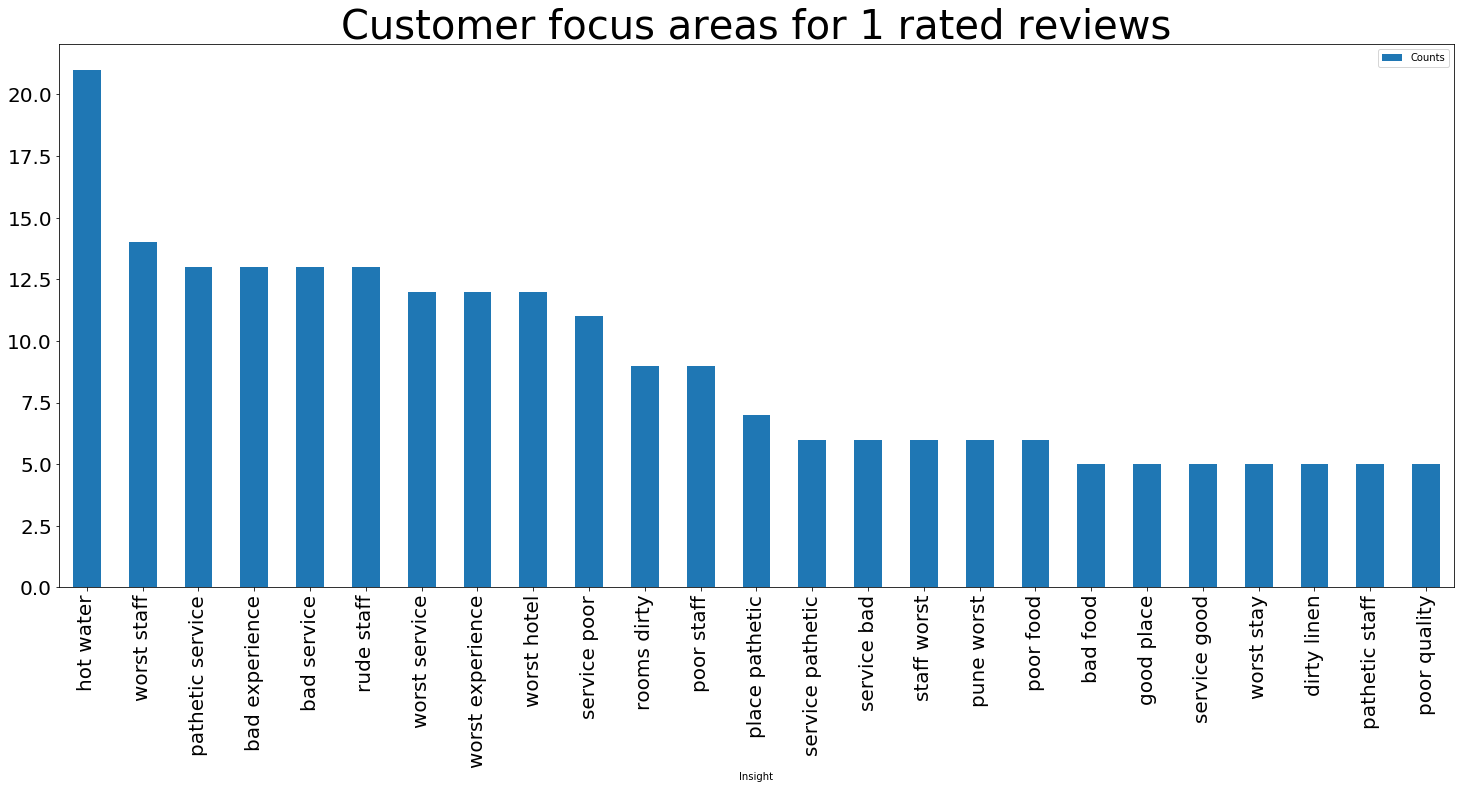

In [54]:
ax = _.head(25).plot.bar(x='Insight', y='Counts', figsize=(25,10),fontsize=20, title='Customer focus areas for 1 rated reviews')
ax.title.set_size(40)

## Summary based on POS based Keywords

In [46]:
vectorizer3 = TfidfVectorizer(ngram_range=(2,4))
vectorizer3.fit(reduced_reviews)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [47]:
keywords3 = []
for i in indices_for_rating(1)[:5]:
    keywords3 += extract_keywords(i, 3, vectorizer3)


Abstract:
If you want to weekend at this place don’t stey very bad service only food is good otherwise all things in this resort is wasted Dharamshala is better than this resort inter com is not working hot water is not in tab so many tv channel is not available 

Keywords:
['weekend place stey bad', 'water not tab tv', 'want weekend']
----------------------------------------------------------------------------------------------------

Abstract:
Please do not take a risk of booking at this Hotel; I had booked for 2nd October, 2015 for 1 night which I intended to continue if the facilities were good . I being from same industry had lot of expectation from the so called Resort . First of all it’s not LONAVALA (Annexe as…

Keywords:
['resort not lonavala annexe', 'october night', 'not risk']
----------------------------------------------------------------------------------------------------

Abstract:
The hotel is so poorly maintained that you will puke at the first smell . The paints ar